# Project Proposal and Initial Analyses

So, what ingredients are needed to craft the perfect concoction for a movie's success? Our team embarked on this cinematic experiment by defining the core questions that drive our analysis and consulting with our head scientist (TA, of course!) during Friday meetups for guidance. With a green light on our five key ingredients, we're set to uncover the data-driven formula behind a successful movie, starting with our main ingredient: the CMU Movies dataset.

In [2]:
# Let's first import all the necessary librairies 

# For data manipulation
import pandas as pd
import numpy as np

# For API Calls
import requests

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the DeprecationWarning for bar graph hues
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Overview of CMU Movies Dataset 

Note: As mentioned on ED and confirmed with our head scientist, Dr. Sepideh, we opted not to upload the full CMU dataset to GitHub. Instead, one team member loaded it locally and created a pickle file, cmu_movies_df.pkl, which can be found in the pickles folder. This file was created in pipelines/movies_cleaning.ipynb. 

In that pipeline, we preprocess the CMU dataset by separating Freebase IDs from their corresponding values, allowing for easier analysis of categorical variables such as languages, countries, and genres. Specifically, we split these columns so that each Freebase ID has a corresponding human-readable name in a separate column. Here’s an example of how we apply this split function:

```python
# Applying the split function to Languages, Countries, and Genres columns
df[['Language Freebase ID', 'Language Name']] = df['Languages'].apply(lambda x: pd.Series(split_freebase_data(x)))
df[['Country Freebase ID', 'Country Name']] = df['Countries'].apply(lambda x: pd.Series(split_freebase_data(x)))
df[['Genre Freebase ID', 'Genre Name']] = df['Genres'].apply(lambda x: pd.Series(split_freebase_data(x)))
```

This step ensures that we can work with a clearer, more structured dataset, which improves the interpretability of our results.

Let’s load that pickle below:

In [3]:
# Loading our CMU movies pickle 
df_cmu_movies = pd.read_pickle("pickles/cmu_imdb_tmdb_merged.pkl")

# Displaying the first few rows
df_cmu_movies.head()

,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,...,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,1071.0,14010832.0,28000000.0,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,4.9,58900.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],...,1.0,0.0,0.0,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,5.6,42.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],...,68.0,0.0,0.0,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",6.1,3090.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],...,13.0,0.0,0.0,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,5.9,647.0


In [4]:
# Let us see the data frames dimension
df_size = df_cmu_movies.shape
print(f"Number of row entries: {df_size[0]} \nNumber of columns: {df_size[1]}")


Number of row entries: 81855 
Number of columns: 24


In [5]:
df_cmu_movies.columns

Index(['Wikipedia Movie ID', 'Freebase Movie ID', 'Movie Name', 'Release Date',
       'Box Office Revenue', 'Runtime', 'Language Freebase ID',
       'Language Name', 'Country Freebase ID', 'Country Name',
       'Genre Freebase ID', 'Genre Name', 'IMDb_ID', 'vote_average',
       'vote_count', 'revenue', 'budget', 'popularity', 'production_companies',
       'director', 'writers', 'producers', 'imdb_rating', 'imdb_votes'],
      dtype='object')

We have a lot of columns! Since we are not going to be using the freebase API, let us remove it from our dataframe.

In [6]:
freebase_columns = [
    'Wikipedia Movie ID', 'Freebase Movie ID', 'Language Freebase ID', 
    'Country Freebase ID', 'Genre Freebase ID'
]
df_cmu_movies = df_cmu_movies.drop(columns=freebase_columns)
df_cmu_movies.columns

Index(['Movie Name', 'Release Date', 'Box Office Revenue', 'Runtime',
       'Language Name', 'Country Name', 'Genre Name', 'IMDb_ID',
       'vote_average', 'vote_count', 'revenue', 'budget', 'popularity',
       'production_companies', 'director', 'writers', 'producers',
       'imdb_rating', 'imdb_votes'],
      dtype='object')

In [7]:
df_cmu_movies.head()

,Movie Name,Release Date,Box Office Revenue,Runtime,Language Name,Country Name,Genre Name,IMDb_ID,vote_average,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
0,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,5.1,1071.0,14010832.0,28000000.0,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,4.9,58900.0
1,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806,7.0,1.0,0.0,0.0,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,5.6,42.0
3,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,5.8,68.0,0.0,0.0,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",6.1,3090.0
4,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],tt0083949,5.3,13.0,0.0,0.0,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,5.9,647.0


#### Duplicates 

Now, let us check for duplicates.

In [8]:
# Checking for duplicates in df_cmu_movies
print(f"Duplicates in df_cmu_movies: {df_cmu_movies['Movie Name'].duplicated().sum()}")

Duplicates in df_cmu_movies: 6377


We initially planned to drop movies with the same name, but we realized that having the same title doesn't necessarily mean it's the same movie. Variations in factors such as production country, release year, and different versions can result in multiple entries with the same title, which makes it important to retain these records rather than remove them.

In [9]:
# Creating a data set with cmu movie duplicates to take a closer look at them
df_cmu_duplicates = df_cmu_movies[df_cmu_movies.duplicated(subset=['Movie Name'], keep=False)]

# Sorting them by Movie Name alphabetically
df_cmu_duplicates = df_cmu_duplicates.sort_values(by='Movie Name')

df_cmu_duplicates.head()

,Movie Name,Release Date,Box Office Revenue,Runtime,Language Name,Country Name,Genre Name,IMDb_ID,vote_average,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
77399,100 Days,1991,NaN,161.0,[Hindi Language],[India],"[Horror, Suspense, World cinema]",tt0101244,5.500,8.0,0.0,0.0,1.739,Jayvijay Enterprises,Partho Ghosh,"Devjyoti Roy, Bhushan Banmali",Jay Mehta,6.3,1188.0
19013,100 Days,2001-02-01,NaN,100.0,[English Language],[United Kingdom],[Drama],tt0315100,4.000,2.0,0.0,0.0,2.121,NaN,Nick Hughes,Nick Hughes,NaN,7.6,85.0
12216,100% Love,2011-04,NaN,140.0,[Telugu language],[],[Romantic comedy],tt1869226,6.100,29.0,0.0,1500000.0,5.203,Geetha Arts,Sukumar,"Hari Prasad, Sukumar, Thota Srinivas","Edida Raja, Bunny Vas, Allu Aravind",7.0,3240.0
69286,100% Love,2012-01-20,NaN,NaN,[Bengali Language],[India],"[Romance Film, Comedy film]",tt2579680,5.600,5.0,0.0,0.0,2.082,SVF Entertainment,Ravi Kinagi,Selvaraghavan,"Jeet, Shrikant Mohta, Mahendra Soni",6.0,886.0
17910,12,2003-06-27,NaN,124.0,[English Language],[United States of America],"[Comedy film, Musical, Indie]",tt0192947,6.421,19.0,0.0,0.0,1.658,NaN,Lawrence Bridges,Lawrence Bridges,NaN,7.7,55.0


In [10]:
# df_cmu_movies = df_cmu_movies.drop_duplicates(subset=['Movie Name'])

#### Null Values

From the data frame head, we see several NaN values. It’s important to understand how many NaNs are present across the entire dataset. We can visualize this with a bar graph, like this:

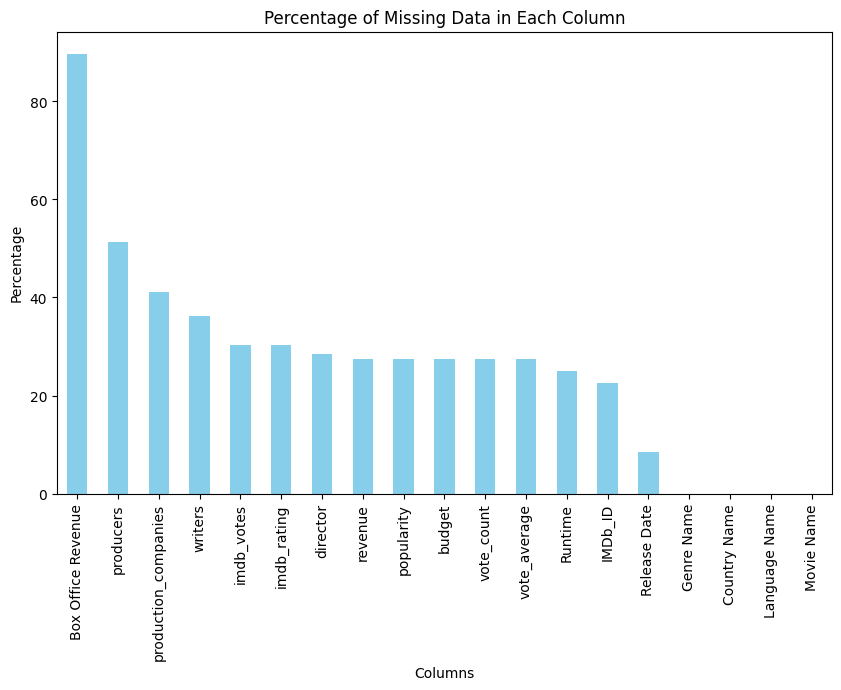

In [11]:
# Calculating the percentage of missing data in each column
missing_data = df_cmu_movies.isnull().mean() * 100

# Sorting columns by missing percentage
missing_data_sorted = missing_data.sort_values(ascending=False)

# Plotting 
plt.figure(figsize=(10,6))
missing_data_sorted.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Data in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

Our dataset has a significant amount of missing values in the box office revenue column, which makes it difficult to apply common techniques like removing rows with null values or replacing them with the mean, as this would lead to substantial data loss.

However, it's important to note that box office revenue is just one component of total revenue, and we have much less missing data in the revenue column. Therefore, when working with the box office data, we can closely consider its relationship to total revenue and use that for further insights.

For other columns with missing data, such as producers, production company, writers, and director, we won't focus on them as much in our analysis. You'll find more details in the analyses below.

## Analysis Proposal 

Now that we have a comprehensive understanding of our data, let's dive into our  'chemical ingredients' that contribute to a movie's success, which have been aproved by our head TA.

### Actor's Success

When people think about a movie's success, the first thing that often comes to mind is the actors. A well-known actor can elevate a movie, making it more popular, drawing larger audiences, and ultimately contributing to its commercial success. Conversely, an unknown actor may not have the same impact. In this section, we aim to explore whether there is a relationship between an actor's success and the average movie ratings they appear in.

To conduct this analysis, we will leverage several datasets: the Oscar dataset, IMDb dataset, the CMU Movie dataset, and Rotten Tomatoes dataset.

Before diving into the analysis, we must first define what constitutes a "successful actor." For many in the industry, winning an Oscar is the pinnacle of achievement. While an actor's success can be measured in many ways, for the purposes of this milestone, we will define a successful actor as one who has won the highest number of Oscars.

To begin, let us load the pickles of the mentioned data sets:

In [ ]:
oscar = pd.read_pickle('pickles/oskar_df.pkl')

# this IMDB is a little different because it also has a "crew" column
# which is important to us in the next few steps
imdb = pd.read_pickle('pickles/imdb_data.pkl')

##### Oscar Dataset

We will start off with the Oscar data. Let us first check if we have any null values:

In [43]:
null_counts = oscar.isnull().sum()
print(null_counts)

year_film          0
year_ceremony      0
ceremony           0
category           0
name               5
film             319
winner             0
dtype: int64


In [44]:
df_size = oscar.shape
print(f"Dimensions of the Oscar DataFrame: {df_size}")

Dimensions of the Oscar DataFrame: (10889, 7)


Since our analysis is focused on Oscar wins rather than the film names, we can ignore the null values in the film name column.

However, actor names are crucial for our analysis, so we will drop the 5 rows with null actor names, as this is not a significant amount of data and will not impact our results.

In [45]:
oscar_analysis = oscar.dropna(subset=['name'])

Let us take a peak at the Oscar data:

In [46]:
oscar_analysis.tail()

,year_film,year_ceremony,ceremony,category,name,film,winner
10883,2023,2024,96,WRITING (Original Screenplay),Screenplay by Samy Burch; Story by Samy Burch ...,May December,False
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,Past Lives,False
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True
10888,2023,2024,96,HONORARY AWARD,"To Carol Littleton, whose commitment to her cr...",NaN,True


The Oscars are awarded not only to actors and actresses, but also to individuals in various other categories. Therefore, we will filter out anyone who does not fall into the actor or actress category for the purposes of our analysis.

In [47]:
oscar_analysis = oscar_analysis[oscar_analysis['category'].str.contains('ACTOR') | oscar_analysis['category'].str.contains('ACTRESS')]

In [48]:
# We used tail instead of head because head didn't visually highlight the impact of the previous line of code,
# while tail provided a clearer view of the results.
oscar_analysis.tail()

,year_film,year_ceremony,ceremony,category,name,film,winner
10780,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Emily Blunt,Oppenheimer,False
10781,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Danielle Brooks,The Color Purple,False
10782,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,America Ferrera,Barbie,False
10783,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Jodie Foster,Nyad,False
10784,2023,2024,96,ACTRESS IN A SUPPORTING ROLE,Da'Vine Joy Randolph,The Holdovers,True


Wow! Quite lucky of us compared to the CMU movies data haha.

##### Oscar Score

We also notice that Best Actor and Best Actress aren’t the only possible Oscar wins; actors can also receive recognition in Supporting Actor and Supporting Actress categories. Additionally, Oscar nominations play a significant role, as even a nomination can enhance an actor’s reputation and attract audiences.

However, lead roles generally have a larger impact on a movie’s success, as these actors often drive the story and have more screen time.  For this reason, we are going to build an Oscar score that applies weights to different award categories, giving greater significance to lead roles and including nominations to reflect their influence. We have decided to apply the following weights:

- Lead Actor Oscar Win (LAO) has weight 4. 

- Supporting Actor Oscar Win (SAO) has weight 3.

- Lead Actor Oscar Nomination (LAN) has weight 2. 

- Supporting Actor Oscar (SAN) Nomination has weight 1.

Oscar Score= [# of LAO]*5 + [# of SAO]*3 +  [# of LAN]*2+ [# of SAN]×1

Let us add an Oscar Score column to the Oscar dataset:

First, let us transform the Winner column into integers:

In [49]:
# Converting boolean 'winner' column to 1 and 0
oscar_analysis['winner'] = oscar_analysis['winner'].astype(int)
oscar_analysis.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,0
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,1
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,0
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,1
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,0


Now let us calculate the oscar score:

In [50]:
def calculate_oscar_score(row):
    # Weights for each type of win or nomination
    lao = 5  
    sao = 3  
    lan = 2  
    san = 1  

    oscar_score = 0

    # Lead role win: No "supporting" in category and winner = 1
    if 'SUPPORTING' not in row['category'].upper() and row['winner'] == 1:
        oscar_score += lao

    # Supporting role win: "supporting" in category and winner = 1
    elif 'SUPPORTING' in row['category'].upper() and row['winner'] == 1:
        oscar_score += sao

    # Lead role nomination: No "supporting" in category and winner = 0
    elif 'SUPPORTING' not in row['category'].upper() and row['winner'] == 0:
        oscar_score += lan

    # Supporting role nomination: "supporting" in category and winner = 0
    elif 'SUPPORTING' in row['category'].upper() and row['winner'] == 0:
        oscar_score += san

    return oscar_score

oscar_analysis['oscar_score'] = oscar_analysis.apply(calculate_oscar_score, axis=1)


In [51]:
oscar_analysis.head()

,year_film,year_ceremony,ceremony,category,name,film,winner,oscar_score
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,0,2
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,1,5
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,0,2
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,1,5
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,0,2


Let us remove the columns that are unnecessary for our section anlaysis.

In [52]:
oscar_analysis = oscar_analysis.drop(['year_ceremony', 'ceremony','year_film','ceremony','category','film','winner'], axis=1)
oscar_analysis = oscar_analysis.rename(columns={'name': 'actor_name'})
oscar_analysis.head()

,actor_name,oscar_score
0,Richard Barthelmess,2
1,Emil Jannings,5
2,Louise Dresser,2
3,Janet Gaynor,5
4,Gloria Swanson,2


Now, let us group these scores by Actor:

In [53]:
# Grouping by actor and sum the 'oscar_score', and also count the number of movies
oscar_analysis = oscar_analysis.groupby('actor_name').agg(total_oscar_score=('oscar_score', 'sum')).reset_index()

# Display the result
oscar_analysis.head()


,actor_name,total_oscar_score
0,Abigail Breslin,1
1,Adam Driver,3
2,Adolph Caesar,1
3,Adolphe Menjou,2
4,Adriana Barraza,1


Let us see what are the top 10 actors according to the Oscar Score:

In [54]:
oscar_analysis.sort_values(by='total_oscar_score', ascending=False, inplace=True)
oscar_analysis.head(10)

,actor_name,total_oscar_score
673,Meryl Streep,46
524,Katharine Hepburn,36
92,Bette Davis,28
392,Jack Nicholson,28
881,Spencer Tracy,24
216,Denzel Washington,21
382,Ingrid Bergman,21
639,Marlon Brando,21
391,Jack Lemmon,20
742,Paul Newman,20


##### IMDB Data set 

Now, let us incorporate the IMDB data in the Oscar Analysis. We are going to calculate the average IMDB score for each actor.

The actor names are stored in the 'crew' column, which contains a comma-separated list of all actors in the movie. To check if a specific actor is part of the movie, we will split the string of actor names and search for the actor in that list. If the actor is found, we will add the movie's IMDb rating to the actor's total IMDb score.

In [ ]:
def calculate_imdb_scores(oscar_analysis, imdb):
    # Creating imdb_score and num_movies
    oscar_analysis['imdb_score'] = 0
    oscar_analysis['num_movies'] = 0

    # Looping through each movie
    for index, row in imdb.iterrows():
        # Split the 'crew' column to get a list of actors
        crew_list = str(row['crew']).split(',') 
        imdb_rating = row['score'] 

        # Looping through each actor
        for actor in oscar_analysis['actor_name']:
            # If actor is in the list of actors for the current movie
            if actor in crew_list:
                # Adding the IMDb score to the actor's total score
                oscar_analysis.loc[oscar_analysis['actor_name'] == actor, 'imdb_score'] += imdb_rating
                # Incrementing the number of movies the actor has participated in
                oscar_analysis.loc[oscar_analysis['actor_name'] == actor, 'num_movies'] += 1

    # Calculating average IMDb score 
    oscar_analysis['imdb_score'] = oscar_analysis['imdb_score'] / oscar_analysis['num_movies']

    return oscar_analysis


In [76]:
oscar_analysis = calculate_imdb_scores(oscar_analysis, imdb)
oscar_analysis.head()

,actor_name,total_oscar_score,imdb_score,num_movies
673,Meryl Streep,46,67.375,8
524,Katharine Hepburn,36,76.000,1
92,Bette Davis,28,80.500,2
392,Jack Nicholson,28,73.300,10
881,Spencer Tracy,24,75.000,2


#### Section Conclusion

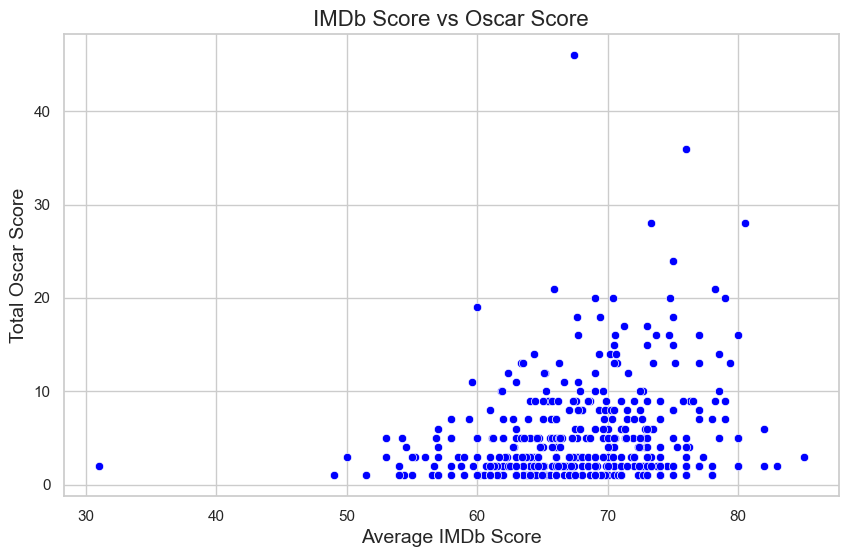

In [81]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the scatter plot for imdb_score vs total_oscar_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='imdb_score', y='total_oscar_score', data=oscar_analysis, color='blue', marker='o')

# Add titles and labels
plt.title('IMDb Score vs Oscar Score', fontsize=16)
plt.xlabel('Average IMDb Score', fontsize=14)
plt.ylabel('Total Oscar Score', fontsize=14)

# Display the plot
plt.show()

The plot of IMDb scores versus Oscar scores shows a slight correlation between the two variables, but the relationship is not strong. While some actors with higher Oscar scores also tend to have higher IMDb scores, this pattern is not consistent across all data points. One reason for this is that the Oscars and IMDb ratings measure different aspects of an actor's career. 

Oscar scores are based on professional recognition for outstanding performances, typically within the context of prestigious award ceremonies, whereas IMDb scores reflect the general public's opinion of movies and performances. These two metrics are influenced by different factors—Oscar wins or nominations are often determined by industry professionals, while IMDb ratings are driven by broader audience sentiments. 

As a result, while some actors may appear in both highly rated Oscar-winning films and movies with high IMDb scores, the correlation between the two is weak. This is because each score is influenced by different factors and biases—Oscars are based on the opinions of industry professionals, while IMDb ratings reflect general public sentiment.

It is thus  useful to conduct further experiments and explore additional factors that could impact a movie's success. We should also consider incorporating other sources of data, such as Metacritic, which includes professional critics' ratings, and Rotten Tomatoes, to provide a more comprehensive view of a movie's reception across different audiences.

### Budget 

In this section, we will explore an important question: Does a higher budget imply better revenue and ratings, and therefore, greater movie success? While it might seem intuitive that a larger budget would lead to greater success, the relationship between a movie's financial investment and its performance is more complex. We'll investigate whether bigger budgets truly correlate with higher box office earnings and better ratings, or if other factors play a more significant role in determining a movie's success. By understanding this connection, we can gain insights into the financial dynamics of the film industry.

To begin our exploration, we will first create a master ratings table by combining the ratings data from multiple sources—Metacritic, IMDb, and Rotten Tomatoes. This will give us a comprehensive view of how a movie is received across different platforms. Additionally, we will gather the budget and revenue information from the IMDb table, as it contains the most reliable financial data for our analysis. By combining these datasets, we aim to better understand whether movies with higher budgets tend to perform better in terms of both revenue and ratings, providing a clearer picture of what factors contribute to a film's success.


#### Metacritic

Let us start off with the metacritic scores.

In [89]:
# Importing Metacritic
metacritic = pd.read_pickle('pickles/metacritic_df.pkl')    
metacritic.head()

,id,metascore,rating,release_date,sort_no,summary,title,user_score
0,549123,94,TV-14,1989-07-26,101,A young boy and his little sister struggle to ...,Grave of the Fireflies (1988),8.9
1,522228,94,PG-13,2000-12-08,102,"In 19th century China, a magical sword given b...","Crouching Tiger, Hidden Dragon",8.2
2,550614,94,G,1970-09-11,103,"In a French forest in 1798, a child is found w...",The Wild Child,6.5
3,549303,94,TV-PG,1943-01-15,104,A young woman discovers her visiting uncle may...,Shadow of a Doubt,8.2
4,539956,94,PG,2015-06-19,105,"Growing up can be a bumpy road, and it’s no ex...",Inside Out,8.7


In [90]:
# some columns are not necessary for this section's analyses, so we will remove them for simplicity 
df_metacritic = metacritic.drop(columns=['id','release_date','sort_no','summary','rating'])
df_metacritic.head()

,metascore,title,user_score
0,94,Grave of the Fireflies (1988),8.9
1,94,"Crouching Tiger, Hidden Dragon",8.2
2,94,The Wild Child,6.5
3,94,Shadow of a Doubt,8.2
4,94,Inside Out,8.7


Let us check for nulls.

In [91]:
df_metacritic.isnull().sum()

metascore     0
title         0
user_score    0
dtype: int64

We see that there are a several user scores that are null. We will adress those later on. 

We also see that Metascore and User Score have different maximum values. To make them comparable, let's normalize the User Score to a scale of 100.

In [92]:
df_metacritic['user_score'] = pd.to_numeric(df_metacritic['user_score'], errors='coerce')
df_metacritic['user_score'] = df_metacritic['user_score'] * 10
df_metacritic.head()

,metascore,title,user_score
0,94,Grave of the Fireflies (1988),89.0
1,94,"Crouching Tiger, Hidden Dragon",82.0
2,94,The Wild Child,65.0
3,94,Shadow of a Doubt,82.0
4,94,Inside Out,87.0


As a note, it might be more insightful to experiment with the weights of critic scores and user scores when determining a movie's overall success in the final analysis. However, for P2, we plan to keep things simple by calculating the average of the critic and user scores. The bigger question, though, is: who truly determines a movie's success? As viewers, we are the audience who watch the films and generate revenue, while critics provide professional reviews. It's worth considering how each group's influence should factor into the overall success of a movie. But that is a question for our head scientist (TA) for the final milestone ...


For now though, we will simply take the average and name that our metacritic_score score:

In [93]:
df_metacritic['metacritic_score'] = df_metacritic[['metascore', 'user_score']].mean(axis=1)

# Dropping the unnecessary columns
df_metacritic = df_metacritic.drop(columns=['metascore', 'user_score'])

df_metacritic.head()

,title,metacritic_score
0,Grave of the Fireflies (1988),91.5
1,"Crouching Tiger, Hidden Dragon",88.0
2,The Wild Child,79.5
3,Shadow of a Doubt,88.0
4,Inside Out,90.5


#### Rotten Tomatoes 

Now, let us move to the rotten tomatoes dataset.

In [98]:
rotten_tomatoes = pd.read_pickle('pickles/rotten_tomatoes.pkl')    
rotten_tomatoes.head()

,title,year,synopsis,critic_score,people_score,consensus,total_reviews,total_ratings,type,rating,...,writer,release_date_(theaters),release_date_(streaming),box_office_(gross_usa),runtime,production_co,sound_mix,aspect_ratio,view_the_collection,crew
0,Black Panther,2018,"After the death of his father, T'Challa return...",96,79.0,Black Panther elevates superhero cinema to thr...,519,"50,000+",Action & Adventure,PG-13 (Sequences of Action Violence|A Brief Ru...,...,"Ryan Coogler, Joe Robert Cole","Feb 16, 2018 wide","May 2, 2018",$700.2M,2h 14m,Walt Disney Pictures,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe,"Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
1,Avengers: Endgame,2019,"Adrift in space with no food or water, Tony St...",94,90.0,"Exciting, entertaining, and emotionally impact...",538,"50,000+",Action & Adventure,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,...,"Christopher Markus, Stephen McFeely","Apr 26, 2019 wide","Jul 30, 2019",$858.4M,3h 1m,"Marvel Studios, Walt Disney Pictures","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ..."
2,Mission: Impossible -- Fallout,2018,Ethan Hunt and the IMF team join forces with C...,97,88.0,"Fast, sleek, and fun, Mission: Impossible - Fa...",433,"10,000+",Action & Adventure,PG-13 (Intense Sequences of Action|Brief Stron...,...,Christopher McQuarrie,"Jul 27, 2018 wide","Nov 20, 2018",$220.1M,2h 27m,"Bad Robot, Tom Cruise","DTS, Dolby Atmos, Dolby Digital",Scope (2.35:1),NaN,"Tom Cruise, Henry Cavill, Ving Rhames, Simon P..."
3,Mad Max: Fury Road,2015,"Years after the collapse of civilization, the ...",97,86.0,With exhilarating action and a surprising amou...,427,"100,000+",Action & Adventure,R (Intense Sequences of Violence|Disturbing Im...,...,"George Miller, Brendan McCarthy, Nick Lathouris","May 15, 2015 wide","Aug 10, 2016",$153.6M,2h,"Kennedy Miller Mitchell, Village Roadshow Pict...",Dolby Atmos,Scope (2.35:1),NaN,"Tom Hardy, Charlize Theron, Nicholas Hoult, Hu..."
4,Spider-Man: Into the Spider-Verse,2018,"Bitten by a radioactive spider in the subway, ...",97,93.0,Spider-Man: Into the Spider-Verse matches bold...,387,"10,000+",Action & Adventure,PG (Mild Language|Frenetic Action Violence|The...,...,"Phil Lord, Rodney Rothman","Dec 14, 2018 wide","Mar 7, 2019",$190.2M,1h 57m,"Lord Miller, Sony Pictures Animation, Pascal P...","Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),NaN,"Shameik Moore, Hailee Steinfeld, Mahershala Al..."


Some columns are not necessary for this section's analyses, so we will remove them for simplicity.

In [100]:
df_tomatoes = rotten_tomatoes.drop(columns=['view_the_collection','writer','rating','genre','original_language','director','producer','year','synopsis','consensus','type','release_date_(theaters)','release_date_(streaming)','runtime','production_co','sound_mix','aspect_ratio','crew'])
df_tomatoes.head()

,title,critic_score,people_score,total_reviews,total_ratings,box_office_(gross_usa)
0,Black Panther,96,79.0,519,"50,000+",$700.2M
1,Avengers: Endgame,94,90.0,538,"50,000+",$858.4M
2,Mission: Impossible -- Fallout,97,88.0,433,"10,000+",$220.1M
3,Mad Max: Fury Road,97,86.0,427,"100,000+",$153.6M
4,Spider-Man: Into the Spider-Verse,97,93.0,387,"10,000+",$190.2M


Similarly, it might be more insightful to experiment with the weights of total ratings, critic scores, and people scores in the final deliverable. But for P2, we plan to keep things simple by taking the average of the critic score and people score.

In [101]:
df_tomatoes['tomatoe_score'] = df_tomatoes[['critic_score', 'people_score']].mean(axis=1)
df_tomatoes = df_tomatoes.drop(columns=['critic_score', 'people_score', 'total_reviews', 'total_ratings'])

df_tomatoes.head()

,title,box_office_(gross_usa),tomatoe_score
0,Black Panther,$700.2M,87.5
1,Avengers: Endgame,$858.4M,92.0
2,Mission: Impossible -- Fallout,$220.1M,92.5
3,Mad Max: Fury Road,$153.6M,91.5
4,Spider-Man: Into the Spider-Verse,$190.2M,95.0


#### Merging 

Before we merge, let us normalize the vote average (tmdb rating) and the imdb rating.

In [104]:
df_cmu_movies.rename(columns={'vote_average': 'tmdb_rating'}, inplace=True)
df_cmu_movies['tmdb_rating'] = df_cmu_movies['tmdb_rating'] * 10
df_cmu_movies['imdb_rating'] = df_cmu_movies['imdb_rating'] * 10
df_cmu_movies.head()

,movie_name,Release Date,Box Office Revenue,Runtime,Language Name,Country Name,Genre Name,IMDb_ID,tmdb_rating,vote_count,revenue,budget,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes
0,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,51.0,1071.0,14010832.0,28000000.0,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0
1,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806,70.0,1.0,0.0,0.0,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,56.0,42.0
3,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,58.0,68.0,0.0,0.0,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",61.0,3090.0
4,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],tt0083949,53.0,13.0,0.0,0.0,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,59.0,647.0


Let the merge begin!

First, we will standardize the movie name columns across each DataFrame to ensure they match and facilitate easier merging.

In [ ]:
df_metacritic = df_metacritic.rename(columns={'title': 'movie_name'})
df_tomatoes = df_tomatoes.rename(columns={'title': 'movie_name'})
df_cmu_movies = df_cmu_movies.rename(columns={'Movie Name': 'movie_name'})

In [107]:
# Merge dataframes on 'movie_name'
df_merged = pd.merge(df_cmu_movies, df_tomatoes, on='movie_name', how='left')
df_merged = pd.merge(df_merged, df_metacritic, on='movie_name', how='left')

In [108]:
df_merged.head()

,movie_name,Release Date,Box Office Revenue,Runtime,Language Name,Country Name,Genre Name,IMDb_ID,tmdb_rating,vote_count,...,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes,box_office_(gross_usa),tomatoe_score,metacritic_score
0,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,51.0,1071.0,...,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0,NaN,NaN,56.0
1,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806,70.0,1.0,...,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,56.0,42.0,NaN,NaN,NaN
3,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,58.0,68.0,...,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",61.0,3090.0,NaN,NaN,NaN
4,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],tt0083949,53.0,13.0,...,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,59.0,647.0,NaN,NaN,NaN


We used a left merge in this cascade of merges because it ensures that all the rows from the left DataFrame (starting with df_tomatoes) are preserved, even if there are no matching rows in the right DataFrames, while aligning the relevant data from each source.

Now, let’s combine the 'Box Office Revenue' and 'box_office_(gross_usa)' columns by taking the average. If one of the values is NaN, we’ll keep the non-NaN value. If both are NaN, the result will be NaN.

In [109]:
# Converting the columns to numeric
df_merged['Box Office Revenue'] = pd.to_numeric(df_merged['Box Office Revenue'], errors='coerce')
df_merged['box_office_(gross_usa)'] = pd.to_numeric(df_merged['box_office_(gross_usa)'], errors='coerce')

# Taking the average or keeping non-NaN values
df_merged['box_office'] = df_merged[['Box Office Revenue', 'box_office_(gross_usa)']].mean(axis=1)

# If both values are NaN, the result will be NaN
df_merged['box_office'] = df_merged['box_office'].where(df_merged[['Box Office Revenue', 'box_office_(gross_usa)']].notna().any(axis=1))

# Removing unnecessary columns
df_merged = df_merged.drop(columns=['Box Office Revenue', 'box_office_(gross_usa)'])

df_merged.head()

,movie_name,Release Date,Runtime,Language Name,Country Name,Genre Name,IMDb_ID,tmdb_rating,vote_count,revenue,...,popularity,production_companies,director,writers,producers,imdb_rating,imdb_votes,tomatoe_score,metacritic_score,box_office
0,Ghosts of Mars,2001-08-24,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,51.0,1071.0,14010832.0,...,13.048,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0,NaN,56.0,14010832.0
1,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,1988,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806,70.0,1.0,0.0,...,1.372,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,56.0,42.0,NaN,NaN,NaN
3,White Of The Eye,1987,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,58.0,68.0,0.0,...,8.048,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",61.0,3090.0,NaN,NaN,NaN
4,A Woman in Flames,1983,106.0,[German Language],[Germany],[Drama],tt0083949,53.0,13.0,0.0,...,2.454,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,59.0,647.0,NaN,NaN,NaN


This is a very useful table, let us make a pickle out of it:

In [110]:
df_merged.to_pickle('pickles/movie_scores.pkl')

Finally, let us grab the average scores of the four platforms!

In [111]:
df_merged['avg_score'] = df_merged[['imdb_rating', 'tomatoe_score', 'metacritic_score','tmdb_rating']].mean(axis=1)
df_merged.head()

,movie_name,Release Date,Runtime,Language Name,Country Name,Genre Name,IMDb_ID,tmdb_rating,vote_count,revenue,...,production_companies,director,writers,producers,imdb_rating,imdb_votes,tomatoe_score,metacritic_score,box_office,avg_score
0,Ghosts of Mars,2001-08-24,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",tt0228333,51.0,1071.0,14010832.0,...,"Animationwerks, Screen Gems, Storm King Produc...",John Carpenter,"John Carpenter, Larry Sulkis",Sandy King,49.0,58900.0,NaN,56.0,14010832.0,52.0
1,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brun bitter,1988,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",tt0094806,70.0,1.0,0.0,...,"Filmeffekt AS, Norsk Film",Sølve Skagen,"Gunnar Staalesen, Sølve Skagen",Dag Alveberg,56.0,42.0,NaN,NaN,NaN,63.0
3,White Of The Eye,1987,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",tt0094320,58.0,68.0,0.0,...,Mrs. White's Productions,Donald Cammell,"China Kong, Laurence Klavan, Donald Cammell, A...","Sue Baden-Powell, Elliott Kastner, Brad Wyman,...",61.0,3090.0,NaN,NaN,NaN,59.5
4,A Woman in Flames,1983,106.0,[German Language],[Germany],[Drama],tt0083949,53.0,13.0,0.0,...,Dieter Geissler Filmproduktion,Robert van Ackeren,"Robert van Ackeren, Catharina Zwerenz",Robert van Ackeren,59.0,647.0,NaN,NaN,NaN,56.0


In [118]:
df_merged.columns.tolist()

['movie_name',
 'Release Date',
 'Runtime',
 'Language Name',
 'Country Name',
 'Genre Name',
 'IMDb_ID',
 'tmdb_rating',
 'vote_count',
 'revenue',
 'budget',
 'popularity',
 'production_companies',
 'director',
 'writers',
 'producers',
 'imdb_rating',
 'imdb_votes',
 'tomatoe_score',
 'metacritic_score',
 'box_office',
 'avg_score']

Now, let us plot the box office against the average score to see if there is any correlation between the two variables

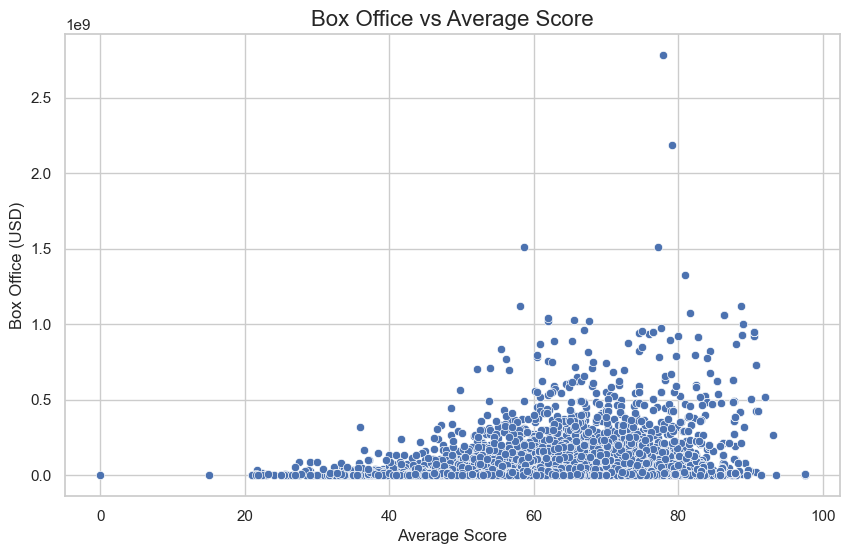

In [112]:
# Removing rows where 'avg_score' or 'box_office' is NaN
df_filtered = df_merged.dropna(subset=['avg_score', 'box_office'])

# Creating a scatter plot of box_office vs avg_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='avg_score', y='box_office')
plt.title('Box Office vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Box Office (USD)', fontsize=12)
plt.show()

Hmm okay, let us now do the same but between revenue and average score...

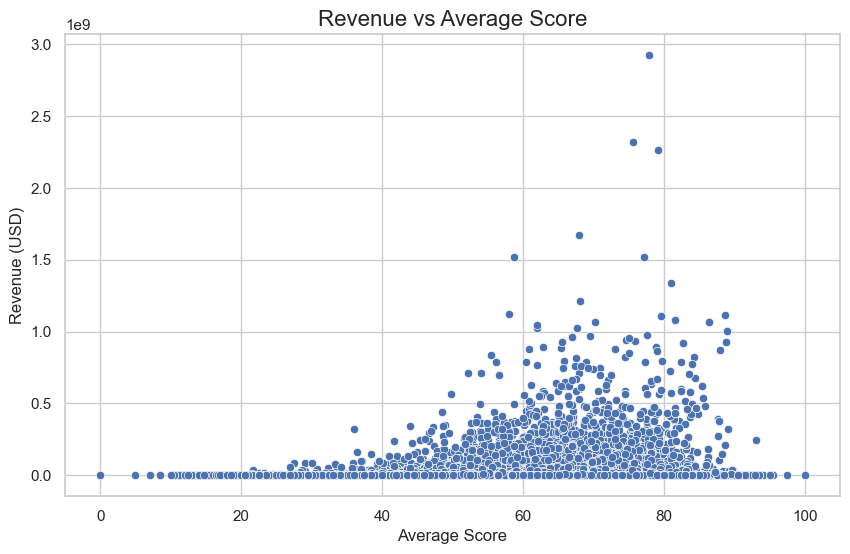

In [113]:
# Removing rows where revenue is NaN
df_filtered_pt2 = df_merged.dropna(subset=['avg_score','revenue'])

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_pt2, x='avg_score', y='revenue')
plt.title('Revenue vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.show()

Hmmm alright, what about budget and avg_score...

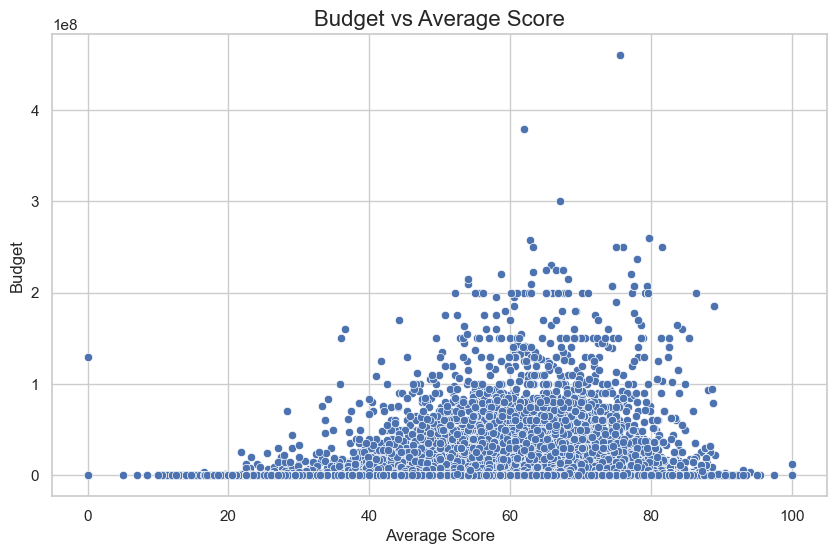

In [119]:
# Removing rows where budget is NaN
df_filtered_pt3 = df_merged.dropna(subset=['avg_score','budget'])

# Creating a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_pt3, x='avg_score', y='budget')
plt.title('Budget vs Average Score', fontsize=16)
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.show()

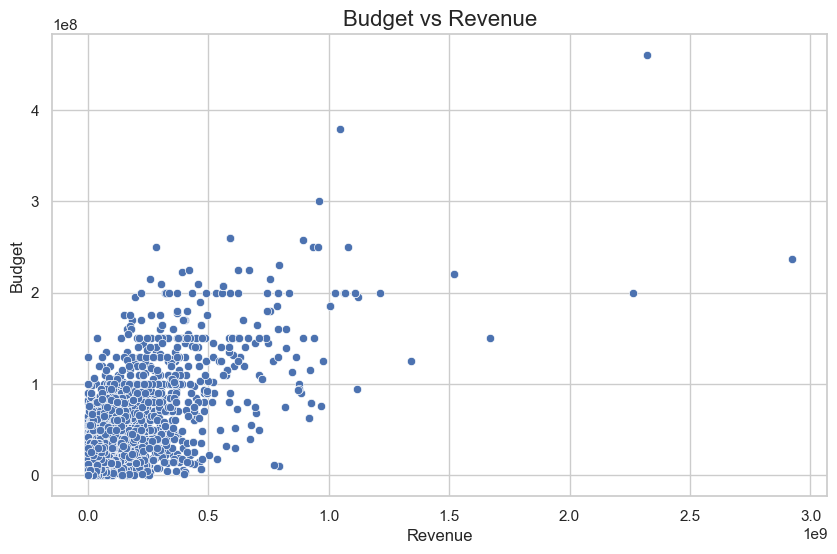

In [121]:
# Removing rows where budget is NaN
df_filtered_pt4 = df_merged.dropna(subset=['revenue','budget'])

# Creating a scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_pt4, x='revenue', y='budget')
plt.title('Budget vs Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.show()

The lack of correlation between revenue, budget, box office, and average scores can be attributed to the complexity of movie success, which is influenced by factors beyond just financials and scores, such as marketing, cast appeal, and timing. Outliers in the data, like films with extraordinary budgets or box office numbers, may not follow typical patterns, and some blockbusters with high earnings may have mixed reviews. Additionally, financial metrics like revenue and budget don't always reflect a film’s true cultural or long-term value, while viewer and critic scores often diverge, with popular films receiving low critic scores but performing well at the box office, and vice versa. Thus, these variables don't always show direct correlations due to the multifaceted nature of movie success.

#### Section Conclusion

In conclusion, while budget, revenue, and box office numbers are important indicators of a film's commercial success, they do not always correlate with the critical or audience reception, as reflected in average scores. A movie can perform well financially despite low ratings, or struggle at the box office despite strong reviews, highlighting that factors such as effective marketing, star power, release timing, and cultural trends play significant roles in a movie's success. The complexity of movie success underscores that while financial metrics and ratings provide useful insights, they alone cannot predict the full impact a film may have.

For future analysis in Milestone 3, we could experiment with weighting the scores of movie critics and regular viewers differently, which may offer a more nuanced understanding of how each group influences a film’s success (or maybe not).